In [1]:
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

# 1

In [2]:
salaries = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])
salaries

array([100,  80,  75,  77,  89,  33,  45,  25,  65,  17,  30,  24,  57,
        55,  70,  75,  65,  84,  90, 150])

In [6]:
mean = salaries.sum()/salaries.size
mean

65.3

In [8]:
var = ((salaries - mean)**2).sum()/salaries.size
var

950.11

In [18]:
var_ddof_1 = ((salaries - mean)**2).sum()/(salaries.size-1)
var_ddof_1

1000.1157894736842

In [9]:
std = np.sqrt(var)
std

30.823854398825596

In [17]:
np.mean(salaries), np.var(salaries), np.var(salaries, ddof=1), np.std(salaries)

(65.3, 950.11, 1000.1157894736842, 30.823854398825596)

# 2

In [20]:
np.quantile?

In [22]:
q_1 = np.quantile(salaries, 0.25)
q_3 = np.quantile(salaries, 0.75)
iqr = q_3 - q_1
q_1, q_3, iqr

(42.0, 81.0, 39.0)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f509d51dfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f509d51a6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f509d51dba8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f509d51ad30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f509d51ae10>],
 'means': []}

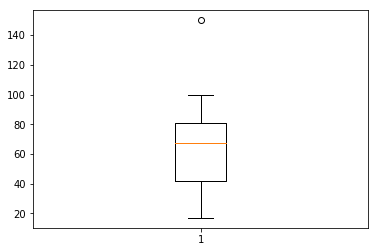

In [23]:
plt.boxplot(salaries)

In [26]:
salaries[np.where(salaries > q_3 + 1.5*iqr)]

array([150])

Из графика видно, что в выборке есть одно значение, которое отстоит далеко от "усов". Далее его легко найти в выборке. 

# 3

По определению распределения Пуассона коэффициэнт а является математическим ожиданием и дисперсией этого распределения. Следовательно в нашем случае эти статистики равны 5.
Согласно википедии мода тоже равняется коэффициэнту а, значит 5 в нашем случае, а медиана рассчитывается по формуле

In [2]:
a = 5
np.trunc(a + (1/3) - (0.02/a))

5.0

# 4

Определимся с событиями:
Р(А) - студент учится на факультете А = 0.25,
Р(В) - студент учится на факультете В = 0.25,
Р(С) - студент учится на факультете А = 0.5,
P(D|A) - студент факультета А сдал сессию = 0.8,
P(D|B) - студент факультета В сдал сессию = 0.7,
P(D|C) - студент факультета С сдал сессию = 0.9,
Р(D) - студент сдал сессию по формуле полной вероятности = P(D|A)*Р(А) + P(D|B)*Р(В) + P(D|C)*Р(С) = 0.825

In [4]:
0.8*0.25+0.7*0.25+0.9*0.5

0.825

Нужные нам вероятности P(A|D), P(B|D), P(C|D) находятся с помощью формулы Байеса

In [6]:
0.8*0.25/0.825

0.24242424242424246

In [7]:
0.7*0.25/0.825

0.21212121212121213

In [8]:
0.9*0.5/0.825

0.5454545454545455

In [9]:
0.24242424242424246+0.21212121212121213+0.5454545454545455

1.0

В качестве проверки просуммируем полученные вероятности, чтобы убедиться, что они составляют полную группу событий